In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [45]:
df = pd.read_csv("/content/Bankruptcy/Bankruptcy.csv")
df.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40,0.10,0.14,0.13,0.03,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60,0.78,0.63,0.05,0.06,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41,0.66,0.70,-0.01,-0.02,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44,0.58,0.57,-0.02,-0.02,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42,0.62,0.46,0.01,0.02,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [46]:
F = df.iloc[:,2:]
R = df.iloc[:,1]

In [63]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(F, R, test_size = 0.3, 
                                                    random_state=2022)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

In [65]:
(X_train.shape, y_train.shape)

((92, 25), (92,))

In [66]:
y_train = y_train.values
y_test = y_test.values

In [67]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [68]:
model.variables

[<tf.Variable 'dense_6/kernel:0' shape=(25, 4) dtype=float32, numpy=
 array([[ 0.3820122 ,  0.16050118,  0.13587916, -0.07003993],
        [-0.15152404, -0.15846062, -0.44167703, -0.24456531],
        [-0.36062834,  0.02690488,  0.24716502,  0.29377836],
        [-0.14357641, -0.00478956,  0.03873882,  0.27581936],
        [-0.33692977,  0.1618653 , -0.12802416,  0.24038684],
        [-0.35439783, -0.14032084, -0.43976   , -0.42288655],
        [-0.2912249 ,  0.1945647 , -0.37005356,  0.18720293],
        [-0.33734742, -0.30571812, -0.3245712 , -0.27869993],
        [-0.09670699, -0.10394484,  0.39573193, -0.2890197 ],
        [ 0.02781597,  0.10465288, -0.3708643 ,  0.01806441],
        [ 0.20667648,  0.07320833, -0.44461268,  0.27636743],
        [-0.06245387, -0.04011968, -0.09619015, -0.20942259],
        [ 0.11516517, -0.06896695, -0.42879713, -0.05849329],
        [ 0.08304358,  0.08436054,  0.25364447,  0.07343835],
        [ 0.10485309, -0.04102618, -0.25887692, -0.3569521 ],
 

In [69]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=500)

Epoch 1/500
3/3 - 1s - loss: 0.6722 - accuracy: 0.5217 - val_loss: 0.6677 - val_accuracy: 0.5000 - 600ms/epoch - 200ms/step
Epoch 2/500
3/3 - 0s - loss: 0.6702 - accuracy: 0.5326 - val_loss: 0.6655 - val_accuracy: 0.5000 - 31ms/epoch - 10ms/step
Epoch 3/500
3/3 - 0s - loss: 0.6686 - accuracy: 0.5326 - val_loss: 0.6634 - val_accuracy: 0.5000 - 37ms/epoch - 12ms/step
Epoch 4/500
3/3 - 0s - loss: 0.6671 - accuracy: 0.5326 - val_loss: 0.6615 - val_accuracy: 0.5000 - 28ms/epoch - 9ms/step
Epoch 5/500
3/3 - 0s - loss: 0.6654 - accuracy: 0.5326 - val_loss: 0.6599 - val_accuracy: 0.5000 - 28ms/epoch - 9ms/step
Epoch 6/500
3/3 - 0s - loss: 0.6644 - accuracy: 0.5326 - val_loss: 0.6583 - val_accuracy: 0.5000 - 27ms/epoch - 9ms/step
Epoch 7/500
3/3 - 0s - loss: 0.6633 - accuracy: 0.5326 - val_loss: 0.6570 - val_accuracy: 0.5000 - 27ms/epoch - 9ms/step
Epoch 8/500
3/3 - 0s - loss: 0.6622 - accuracy: 0.5217 - val_loss: 0.6557 - val_accuracy: 0.5000 - 30ms/epoch - 10ms/step
Epoch 9/500
3/3 - 0s - los

In [72]:
model.get_weights()

[array([[ 0.33486426, -0.00460496,  0.13587916, -0.07003993],
        [-0.13433142,  0.16585825, -0.44167703, -0.24456531],
        [-0.3724018 , -0.05249836,  0.24716502,  0.29377836],
        [-0.1448647 ,  0.17519447,  0.03873882,  0.27581936],
        [-0.3217867 ,  0.45924124, -0.12802416,  0.24038684],
        [-0.3818035 , -0.24456634, -0.43976   , -0.42288655],
        [-0.32775614,  0.08491308, -0.37005356,  0.18720293],
        [-0.3458829 , -0.14222392, -0.3245712 , -0.27869993],
        [-0.09751844, -0.18230063,  0.39573193, -0.2890197 ],
        [ 0.08522726,  0.5470415 , -0.3708643 ,  0.01806441],
        [ 0.19085248, -0.07525028, -0.44461268,  0.27636743],
        [-0.11253668, -0.32970244, -0.09619015, -0.20942259],
        [ 0.06614646, -0.33559546, -0.42879713, -0.05849329],
        [ 0.06484749,  0.05297977,  0.25364447,  0.07343835],
        [ 0.08815283, -0.04547486, -0.25887692, -0.3569521 ],
        [ 0.3317852 ,  0.26765412,  0.4035254 , -0.00343007],
        

In [73]:
%matplotlib inline

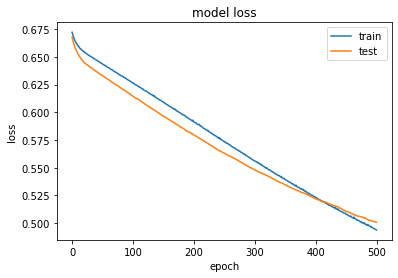

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2442: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2442: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

In [76]:
from sklearn.metrics import accuracy_score
predict_probs= model.predict(X_test)
predict_probs[:5]

array([[0.42811814],
       [0.6829158 ],
       [0.46297607],
       [0.3267917 ],
       [0.79117537]], dtype=float32)

In [77]:
predict_classes = np.where(predict_probs>=0.5,1,0)
predict_classes[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]])

In [78]:
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.825
